In [67]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [68]:
df = pd.read_csv("C:\\Users\\G Varun\\PycharmProjects\\pythonProject\\FinanceForecaster\\data\\HDFC.csv")

In [69]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [70]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06,2.620759e+14,102159.051303,1.329440e+06,0.653088
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06,3.607844e+14,57948.603200,2.555073e+06,0.128115
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05,2.461178e+13,62011.500000,2.688070e+05,0.575200
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06,1.684207e+14,90405.000000,1.021574e+06,0.666900
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06,3.419282e+14,129754.500000,1.939101e+06,0.742000
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,538170.000000,1.483131e+08,0.989400


In [71]:
df.shape

(5306, 15)

# converting date which is stored as object to proper datetime format

In [72]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Identifying na values in the fields

In [73]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [74]:
def check_stationarity(series):
    result = adfuller(series)
    return result[0], result[1]

In [75]:
adf, p_val = check_stationarity(df['Close'])
print("ADF Statistic: ", adf)
print("p-value: ", p_val)

ADF Statistic:  -2.2519176546696387
p-value:  0.18794444504215568


In [76]:
if p_val <= 0.05:
    print("Data is stationary. Differencing not req")
else:
    print("Data is not stationary. Differencing is req")

Data is not stationary. Differencing is req


# Differencing the data

In [77]:
df['Close_diff'] = df['Close'].diff().dropna()
adf_, p_val_ = check_stationarity(df['Close_diff'].dropna())
print("ADF Statistic: ", adf_)
print("p-value: ", p_val_)

ADF Statistic:  -44.51944965319528
p-value:  0.0


C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


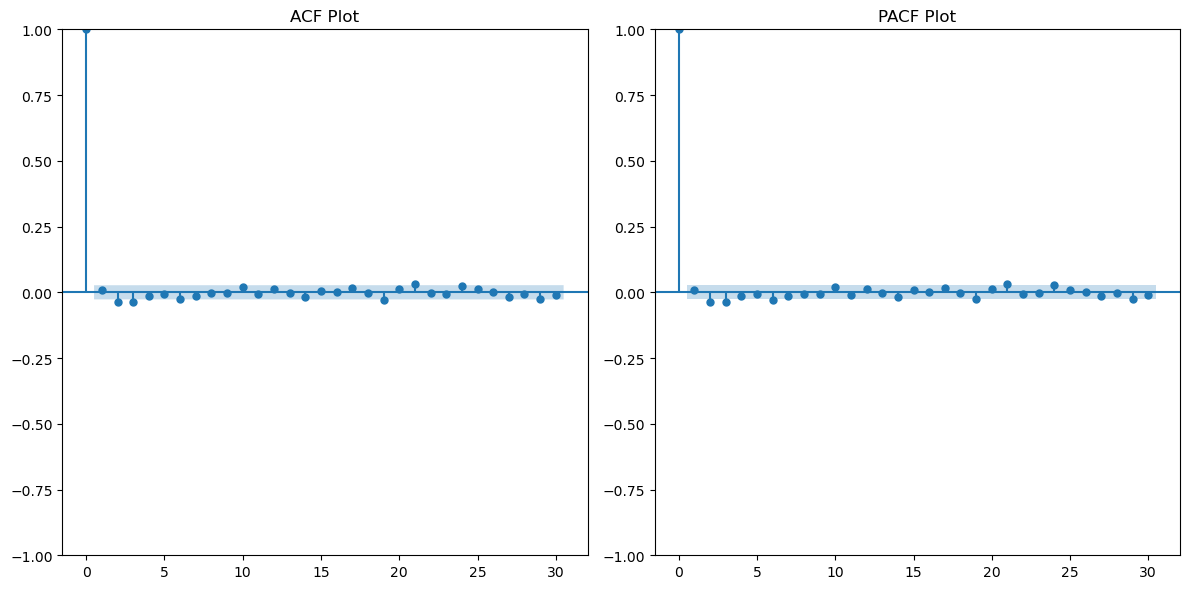

In [78]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Close_diff'].dropna(), ax=plt.gca(), lags=30)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Close_diff'].dropna(), ax=plt.gca(), lags=30)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [79]:
df = df.asfreq('B') 

In [80]:
p, d, q = 1, 1, 1
model = ARIMA(df['Close'], order=(p, d, q))
model_fit = model.fit()

In [81]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5565
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27989.103
Date:                Tue, 25 Mar 2025   AIC                          55984.206
Time:                        15:46:07   BIC                          56004.078
Sample:                    01-03-2000   HQIC                         55991.133
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8151      0.087      9.391      0.000       0.645       0.985
ma.L1         -0.8423      0.081    -10.341      0.000      -1.002      -0.683
sigma2      2271.1400      1.807   1256.701      0.000    2267.598    2274.682
===================================================================================
Ljung-Box (L1) (Q):                   6.33   Jarque-Bera (JB):         370202048.27
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                           -24.44
Prob(H) (two-sided):                  0.00   Kurtosis:                      1265.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close_diff
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5.282000e+03,5.282000e+03,2444.000000,4.774000e+03,4774.000000,5281.000000
mean,1284.089796,1284.816357,1304.734201,1263.705008,1284.345381,1284.533378,1284.109593,1.855123e+06,2.629915e+14,102568.899755,1.335096e+06,0.654276,0.439547
std,709.436389,709.751382,721.368866,697.510220,709.338300,709.515099,709.175177,2.995828e+06,3.611260e+14,57736.974497,2.559742e+06,0.126978,48.191784
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,3209.000000,1.786000e+03,0.119000,-2387.750000
25%,668.562500,669.187500,677.512500,660.000000,669.000000,668.662500,668.202500,3.095900e+05,2.545739e+13,62131.000000,2.730560e+05,0.576675,-11.000000
50%,1137.825000,1137.950000,1157.075000,1119.900000,1139.000000,1138.500000,1139.870000,1.356710e+06,1.696079e+14,90620.000000,1.029849e+06,0.667450,0.150000
75%,1811.787500,1813.975000,1835.262500,1783.662500,1812.037500,1811.837500,1812.677500,2.738430e+06,3.436578e+14,129955.500000,1.943318e+06,0.742300,12.750000
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,538170.000000,1.483131e+08,0.989400,435.650000


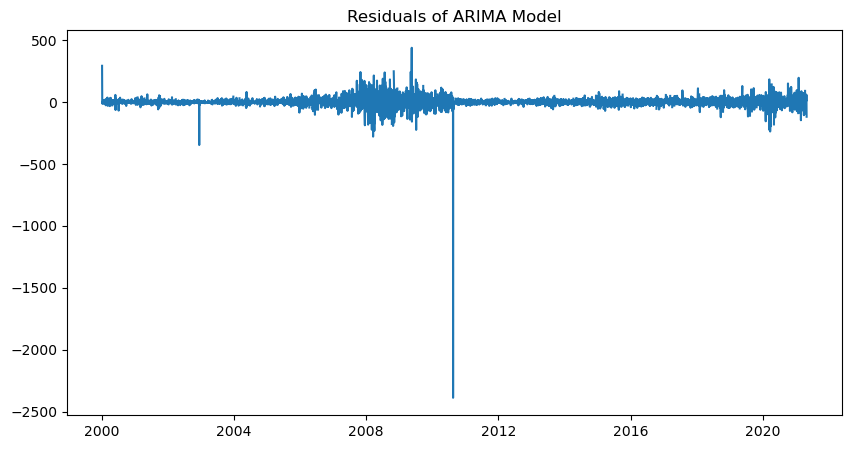

C:\Users\G Varun\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


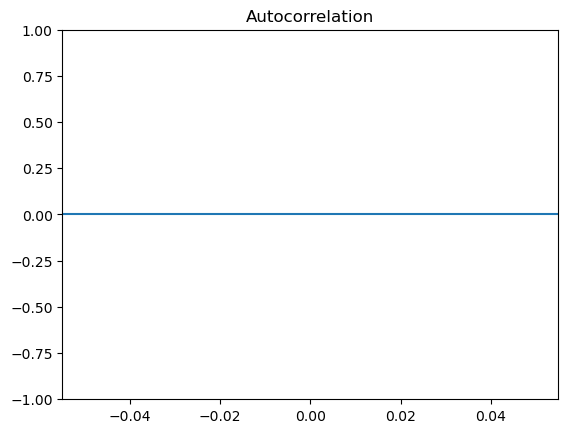

In [84]:
residuals = model_fit.resid  # Assuming 'model' is your fitted ARIMA model

# Plot residuals
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# Check autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.show()

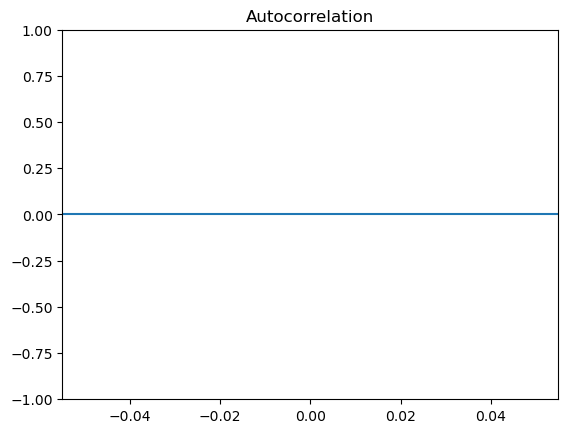

In [85]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.show()

In [86]:
#since there's no correlation, we conclude that arima has captured all patterns well

# Forecasting for the next 'n' days

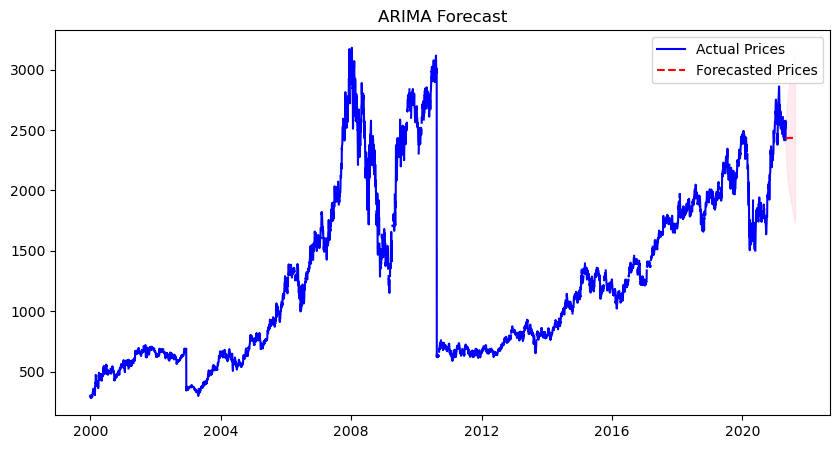

In [92]:
n_forecast = 75  # Forecasting the next 30 days

# Get forecast, standard errors, and confidence intervals
forecast_obj = model_fit.get_forecast(steps=n_forecast)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

# Convert to DataFrame for better visualization
forecast_df = pd.DataFrame({'Forecast': forecast}, 
                           index=pd.date_range(start=df.index[-1], periods=n_forecast+1, freq='B')[1:])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label="Actual Prices", color='blue')
plt.plot(forecast_df, label="Forecasted Prices", color='red', linestyle='dashed')
plt.fill_between(forecast_df.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast")
plt.show()
